In [ ]:
# Сделаем фиттер для параметров (a, b) функции Бета из предположения, что Бета - можно задать как линейную функцию
# или как константу



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

cases = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 6, 6, 6, 9, 9, 
         15, 19, 24, 33, 33, 53, 56, 86, 98, 131, 137
         , 191, 262, 290, 410, 546, 703, 817, 1014, 1226,
         1613, 1880, 2475, 2923, 3357, 3893, 4484, 5181,
         5841, 6698, 7822, 8852, 10158, 11513, 13002, 14776,
         16146, 18105, 20754, 24324, 26350, 29433, 31981, 33940,
         36897, 39509, 42480, 45351, 48426, 50646, 53739, 57300, 
         62658, 68606, 74401, 80115, 85973, 92676, 98522]

def f(y, t, beta, rho):
    Xi = y[0] # susceptible
    Vi = y[1] # exposed
    Qi = y[2] # infectious
    Wi = y[3] # non-symptomatical
    Yi = y[4] # symptomatical (non-hospitalized)
    Ui = y[5] # hospitalized
    Zi = y[6] # removed
    Di = y[7] # dead
    f0 = -beta * Xi * Qi / N
    f1 = beta * Xi * Qi / N - (1 / sigma) * Vi
    f2 = (1 / sigma) * Vi - (1 / xi) * Qi
    f3 = (1 / xi) * mu * Qi - (1 / lmbda) * Wi
    f4 = (1 / xi) * (1 - mu) * Qi - 0.87 * (1 / gamma) * Yi - 0.13 * (1 / eta) * Yi
    f5 = 0.13 * (1 / eta) * Yi - (1 / gamma) * Ui / (1 - rho)
    f6 = (1 / lmbda) * Wi + 0.87 * (1 / gamma) * Yi + (1 / gamma) * Ui
    f7 = rho / (1 - rho) * Ui
    return [f0, f1, f2, f3, f4, f5, f6, f7]


In [ ]:
sigma = 5.1 # mean incubation period
eta = 3.5 # avg time between symptoms and hospitalization
delta = 14.68 # avg time between hospitalization and death
gamma = 11.36 # avg curation time (with symptoms)
lmbda = 11.36 # avg curation time (no symptoms)
mu = 0.88 # amount of non-symptom cases
xi = 3 # mean time between end of incub. period and detection of a virus


In [ ]:
def error(a, b, y0, n1, n2):
    error = 0
    best_beta = None
    for i in range(n1, n2):
        beta = a * i + b
        f2 = partial(f, beta=beta, rho=0.5)
        t = np.linspace(i, i + 1, 70)
        soln = odeint(f2, y0, t)
        X = soln[:, 0]
        V = soln[:, 1]
        Q = soln[:, 2]
        W = soln[:, 3]
        Y = soln[:, 4]
        U = soln[:, 5]
        Z = soln[:, 6]
        D = soln[:, 7]
        to_sum = W[69] + Y[69] + U[69] + Z[69] - cases[i]
        error += to_sum * to_sum
        y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    return error

In [ ]:
# Произведём подбор линейных аппроксимаций параметра бета на двух временных отрезках, с начала эпидемии и до
# введения режима пропусков и серьезного карантина, и с момента введения карантина по текущий момент.
# Ниже приведен подбор на первом периоде

from functools import partial

N = 12537954

a_step = 0.00001
b_step = 0.001
min_b = 1.35
max_b = 1.51
max_a = -0.0156
min_a = -0.0170
best_error = 10e12
best_params = None
a = min_a
while (a <= max_a):
    b = min_b
    while (b <= max_b):
        y0 = [N - 1, 0, 1, 0, 0, 0, 0, 0]
        new_err = error(a, b, y0, 0, 54)
        if new_err < best_error:
            best_error = new_err
            best_params = [a, b]
        b += b_step
    print("a = {} done".format(a))
    a += a_step

In [ ]:
print("Best error: {} with parameters a: {} b: {}".format(best_error, best_params[0],
                                                                               best_params[1]))

In [ ]:
for i in range(55):
    xi = 3
    beta = -0.015970000000000043 * i + 1.3989999999999947
    f2 = partial(f, beta=beta, rho=0.5)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]

In [ ]:
print(y0)

In [ ]:
# Ниже приведен подбор линейной функции на втором периоде

a_step = 0.0001
b_step = 0.001
min_b = 1
max_b = 2
max_a = -0.01
min_a = -0.015
best_error = 10e12
best_params = None
a = min_a
y_55 = [12493060.355396619, 14792.525232326743, 7171.554084447849, 11633.335426068,
        1403.3831372589143, 186.0073168823674, 9579.690733370162, 1444.4089254094126]
while (a <= max_a):
    b = min_b
    while (b <= max_b):
        y0 = y_55
        new_err = error(a, b, y0, 55, len(cases) - 1)
        if new_err < best_error:
            best_error = new_err
            best_params = [a, b]
        b += b_step
    print("a = {} done".format(a))
    a += a_step

In [ ]:
print("Best error: {} with parameters a: {} b: {}".format(best_error, best_params[0],
                                                                               best_params[1]))

In [ ]:
# Ниже приведен подбор константы на втором периоде

def error_const(с, y0, n1, n2):
    error = 0
    best_beta = None
    for i in range(n1, n2):
        f2 = partial(f, beta=с, rho=0.5)
        t = np.linspace(i, i + 1, 70)
        soln = odeint(f2, y0, t)
        X = soln[:, 0]
        V = soln[:, 1]
        Q = soln[:, 2]
        W = soln[:, 3]
        Y = soln[:, 4]
        U = soln[:, 5]
        Z = soln[:, 6]
        D = soln[:, 7]
        to_sum = W[69] + Y[69] + U[69] + Z[69] - cases[i]
        error += to_sum * to_sum
        y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    return error

c_step = 0.0001
max_c = 1
min_c = 0
best_error = 10e12
best_const = None
c = min_c
y_55 = [12493060.355396619, 14792.525232326743, 7171.554084447849, 11633.335426068, 
        1403.3831372589143, 186.0073168823674, 9579.690733370162, 1444.4089254094126]

while (c <= max_c):
    y0 = y_55
    new_err = error_const(c, y0, 55, len(cases) - 1)
    if new_err < best_error:
        best_error = new_err
        best_const = c
    print("c = {} done".format(c))
    c += c_step


In [ ]:
print("Best error: {} with parameter c: {}".format(best_error, best_const))

### Описанние метода и полученных параметров: 

Изначально мы считаем $beta$ с помощью аппроксимации линейной функции перебором по допустимому диапазону значений. 
Предположим, что $beta$ глобально различается на двух различных периодах, до введения карантина и после. 

Тогда есть два варианта аппроксимации $betа$ на втором периоде: 

1. Приближать $beta$ как ломанную линейную функцию методом аналогичным приближению линейной функции на первом периоде
2. Приближать $beta$ как константу простым перебором по $beta$

Итого при параметрах функции a = -0.015970000000000043 b = 1.3989999999999947 на первом периоде, на втором периоде получаются следующие значения параметров:

1. При error = 115904409.57549664, a = -0.010000000000000092 b = 1.054999999999994 /Нужно точнее подобрать, очень большая ошибка
2. При error = 71569223.85513526, c = 0.4588999999999658

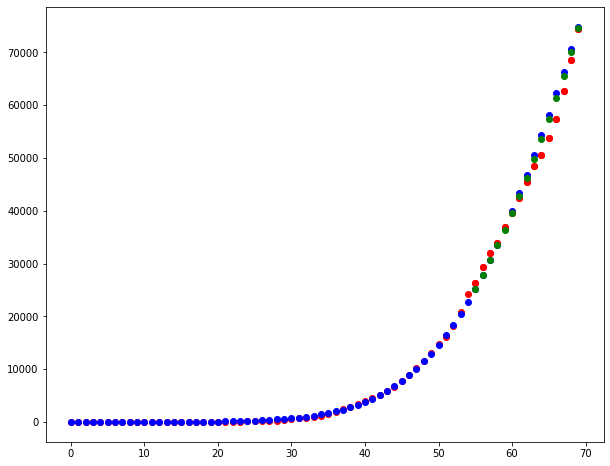

In [75]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

y0 = [N - 1, 0, 1, 0, 0, 0, 0, 0]
forecast_linear = list()
forecast_const = list()

for i in range(55):
    xi = 3
    beta = -0.015970000000000043 * i +  1.3989999999999947
    f2 = partial(f, beta=beta, rho=0.5)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    plt.scatter(i, cases[i], color='red')
    plt.scatter(i, W[69] + Y[69] + U[69] + Z[69], color='blue')


for i in range(55, len(cases) + 15):
    xi = 3
    beta = -0.010000000000000092 * i + 1.054999999999994 
    f2 = partial(f, beta=beta, rho=0.5)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    if i < 70:
        plt.scatter(i, cases[i], color='red')
        plt.scatter(i, W[69] + Y[69] + U[69] + Z[69], color='blue')
    else:
        forecast_linear.append(W[69] + Y[69] + U[69] + Z[69])


y0 = y_55

for i in range(55, len(cases) + 15):
    xi = 3
    beta = 0.4588999999999658
    f2 = partial(f, beta=beta, rho=0.5)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    if i < 70:
        plt.scatter(i, cases[i], color='red')
        plt.scatter(i, W[69] + Y[69] + U[69] + Z[69], color='green')
    else:
        forecast_const.append(W[69] + Y[69] + U[69] + Z[69])

plt.show()

In [76]:
print("Сравнение прогнозов при ломанной линейной бета на втором периоде:")
print(forecast_linear)
print(cases[70:])

Сравнение прогнозов при ломанной линейной бета на втором периоде:
[79202.1380595156, 83601.03014011246, 88032.40658249035, 92480.57018158927, 96929.4507239717, 101362.77012411154, 105764.21436411754, 110117.60935747225, 114407.0977027626, 118617.31320427006, 122733.5500186009, 126741.92334353138, 130629.51869766592, 134384.5270456485, 137996.36346844808, 141455.76659833142, 144754.87798887605, 147887.29960525947, 150848.1286790756]
[80115, 85973, 92676, 98522]


In [77]:
print("Сравнение прогнозов при константной бета на втором периоде:")
print(forecast_const)
print(cases[70:])

Сравнение прогнозов при константной бета на втором периоде:
[79294.64771635957, 84256.01622412543, 89427.72877704784, 94818.33892860537, 100436.70728749648, 106292.00893618315, 112393.74093370393, 118751.72976121292, 125376.1386252717, 132277.47455743712, 139466.59524075172, 146954.7154985678, 154753.41338014803, 162874.63577493053, 171330.7034838117, 180134.315671588, 189298.5536200266, 198836.8836960072, 208763.15944392083]
[80115, 85973, 92676, 98522]
